In [177]:
import scanpy as sc
import pandas as pd
from cellflow.metrics import compute_e_distance
import seaborn as sns
import matplotlib.pyplot as plt
import os

import seaborn as sns
import pandas as pd

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/pbmc_with_pca.h5ad")

In [176]:
output_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc/data/specificity_preds"

In [155]:
df = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/true_to_train_baseline_donor.csv")

In [156]:
test_cytokines = ['ADSF',
 'BAFF',
 'CD27L',
 'FasL',
 'IFN-gamma',
 'IFN-omega',
 'IL-1Ra',
 'IL-32-beta',
 'M-CSF',
 'OX40L']

In [157]:
df.head()

,Unnamed: 0,cytokine,donor_1,donor_2,e_distance
0,0,ADSF,Donor10,Donor10,0.000000
1,1,ADSF,Donor10,Donor11,155.878063
2,2,ADSF,Donor10,Donor12,265.657229
3,3,ADSF,Donor10,Donor1,227.429449
4,4,ADSF,Donor10,Donor2,371.605928


In [158]:
donors = adata.obs["donor"].unique()

In [179]:
df_cf = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/metrics_new_donor/metrics_new_donor.csv", index_col=0)

In [180]:
df_cf["condition"] = df_cf.index
df_cf["donor"] = df_cf.apply(lambda x: x["condition"].split("_")[0], axis=1)
df_cf["cytokine"] = df_cf.apply(lambda x: "_".join(x["condition"].split("_")[1:]), axis=1)
df_cf = df_cf[df_cf['num_cytokines_in_train']==81]
df_cf = df_cf[["ood_e_distance", "donor", "cytokine"]]
df_cf["method"] = "CellFlow"

In [181]:
df["donor"] = df["donor_1"]
df["method"] = df["donor_2"]
df["ood_e_distance"] = df["e_distance"]
df["condition"] = df.apply(lambda x: x["donor"] + "_" + x["cytokine"], axis=1)
df = df[df["donor_1"]!=df["donor_2"]]
df.head()

,Unnamed: 0,cytokine,donor_1,donor_2,e_distance,donor,method,ood_e_distance,condition
1,1,ADSF,Donor10,Donor11,155.878063,Donor10,Donor11,155.878063,Donor10_ADSF
2,2,ADSF,Donor10,Donor12,265.657229,Donor10,Donor12,265.657229,Donor10_ADSF
3,3,ADSF,Donor10,Donor1,227.429449,Donor10,Donor1,227.429449,Donor10_ADSF
4,4,ADSF,Donor10,Donor2,371.605928,Donor10,Donor2,371.605928,Donor10_ADSF
5,5,ADSF,Donor10,Donor3,139.074194,Donor10,Donor3,139.074194,Donor10_ADSF


In [182]:
df_all = pd.concat((df_cf, df[df_cf.columns]))
df_all["type"] = df_all.apply(lambda x: "CellFlow" if x["method"]=="CellFlow" else "training_reference", axis=1)


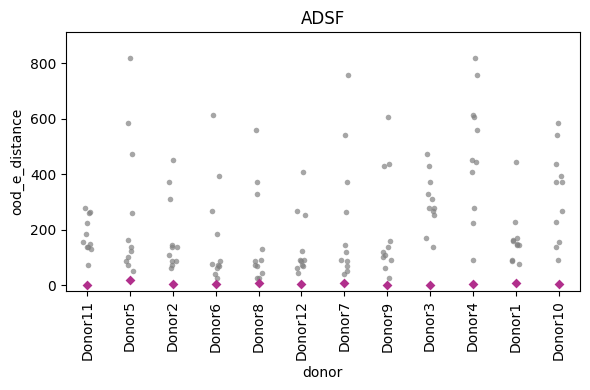

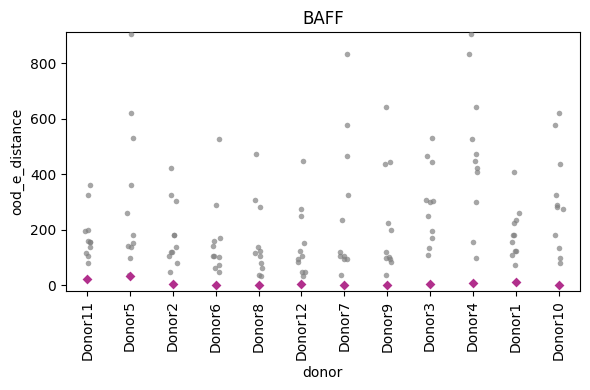

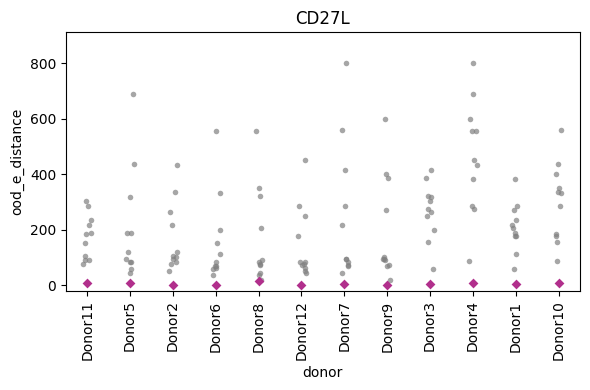

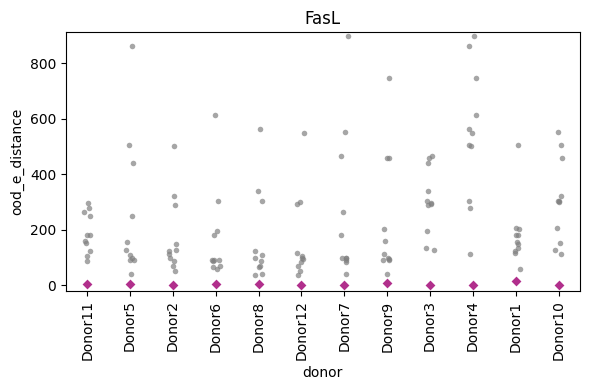

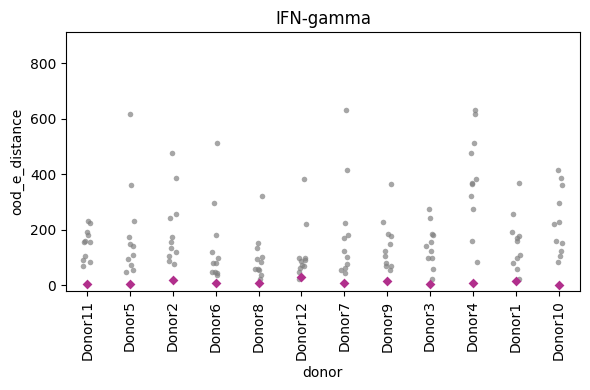

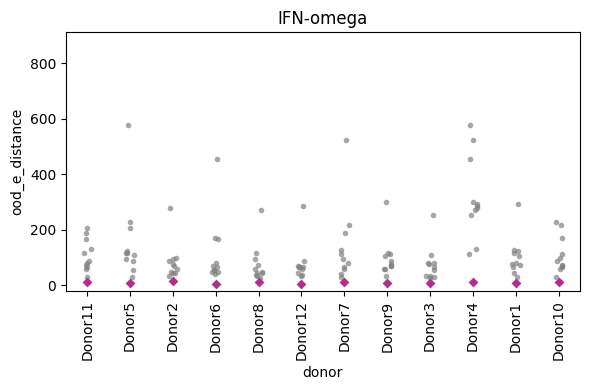

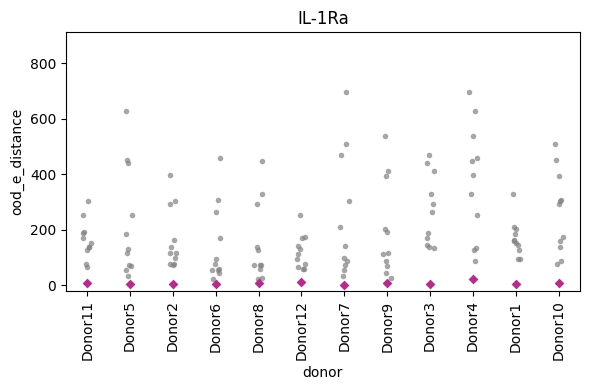

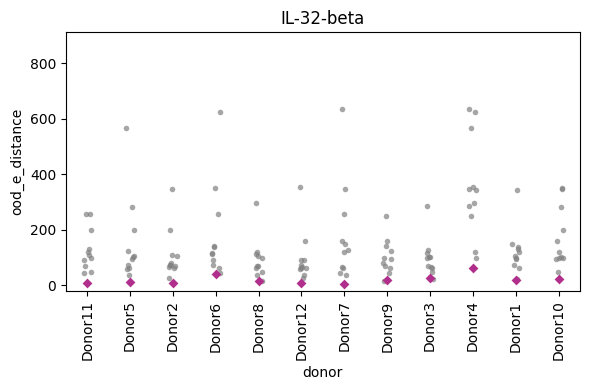

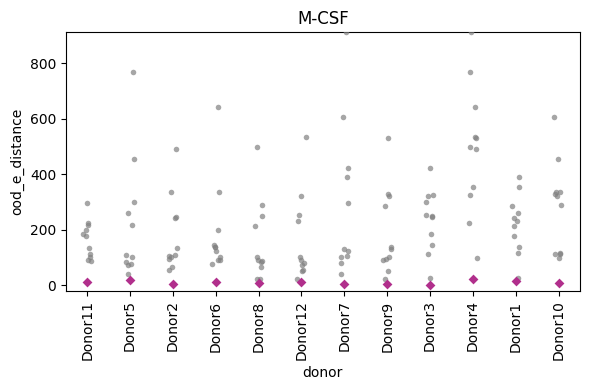

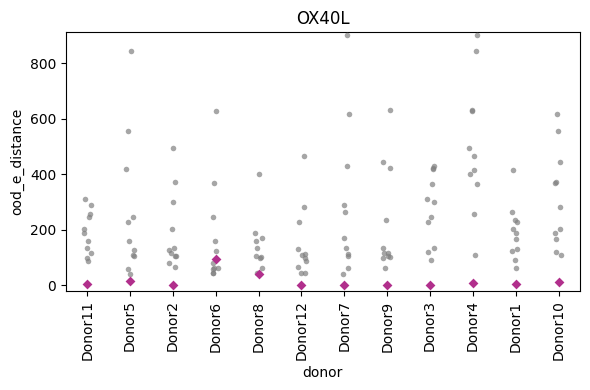

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

test_cytokines = [
    'ADSF', 'BAFF', 'CD27L', 'FasL', 'IFN-gamma',
    'IFN-omega', 'IL-1Ra', 'IL-32-beta', 'M-CSF', 'OX40L'
]

donor_order = [
    'Donor11', 'Donor5', 'Donor2', 'Donor6', 'Donor8', 'Donor12',
    'Donor7', 'Donor9', 'Donor3', 'Donor4', 'Donor1', 'Donor10'
]

# Compute global y-axis limits
ood_vals = df_all[df_all["cytokine"].isin(test_cytokines)]["ood_e_distance"]
ymin, ymax = -20, ood_vals.max()

for cytokine in test_cytokines:
    df_tmp = df_all[df_all["cytokine"] == cytokine].copy()
    df_tmp["donor"] = pd.Categorical(df_tmp["donor"], categories=donor_order, ordered=True)

    plt.figure(figsize=(6, 4))

    sns.stripplot(
        data=df_tmp[df_tmp["type"] == "training_reference"],
        x="donor", y="ood_e_distance",
        color="gray", alpha=0.7, size=4, jitter=True
    )

    sns.stripplot(
        data=df_tmp[df_tmp["type"] == "CellFlow"],
        x="donor", y="ood_e_distance",
        color="#B12F8C", size=5, marker="D", jitter=True
    )

    plt.title(cytokine)
    plt.xticks(rotation=90)
    plt.ylim(ymin, ymax)  # Set shared y-axis range
    plt.legend([], [], frameon=False)
    plt.tight_layout()

    # Save and show
    plt.savefig(os.path.join(output_dir, f"{cytokine}_ood_distance_stripplot.pdf"), format="pdf")
    plt.show()
    plt.close()


# Cytokine similarity

In [172]:
df_cyto = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/true_to_train_baseline_cytokine.csv", index_col=0)

In [173]:
df_cyto["method"] = df_cyto["reference_cyto"]
df_cyto["cytokine"] = df_cyto["test_cytokine"]
df_cyto["ood_e_distance"] = df_cyto["e_distance"]
df_cyto["condition"] = df_cyto.apply(lambda x: x["donor"] + "_" + x["test_cytokine"], axis=1)

In [192]:
df_cyto.sort_values("ood_e_distance")

,donor,test_cytokine,reference_cyto,e_distance,method,cytokine,ood_e_distance,condition
4314,Donor3,FasL,IFN-lambda2,0.204687,IFN-lambda2,FasL,0.204687,Donor3_FasL
7432,Donor7,BAFF,LIF,0.345043,LIF,BAFF,0.345043,Donor7_BAFF
4841,Donor3,OX40L,LIGHT,0.347434,LIGHT,OX40L,0.347434,Donor3_OX40L
3983,Donor2,OX40L,GITRL,0.347516,GITRL,OX40L,0.347516,Donor2_OX40L
7387,Donor7,BAFF,HGF,0.357208,HGF,BAFF,0.357208,Donor7_BAFF
...,...,...,...,...,...,...,...,...
595,Donor10,IL-32-beta,IL-12,406.793129,IL-12,IL-32-beta,406.793129,Donor10_IL-32-beta
5445,Donor4,IL-32-beta,IFN-beta,412.299278,IFN-beta,IL-32-beta,412.299278,Donor4_IL-32-beta
597,Donor10,IL-32-beta,IL-15,428.841762,IL-15,IL-32-beta,428.841762,Donor10_IL-32-beta
641,Donor10,IL-32-beta,TL1A,431.854379,TL1A,IL-32-beta,431.854379,Donor10_IL-32-beta


In [174]:
df_all = pd.concat((df_cf, df_cyto[df_cf.columns]))

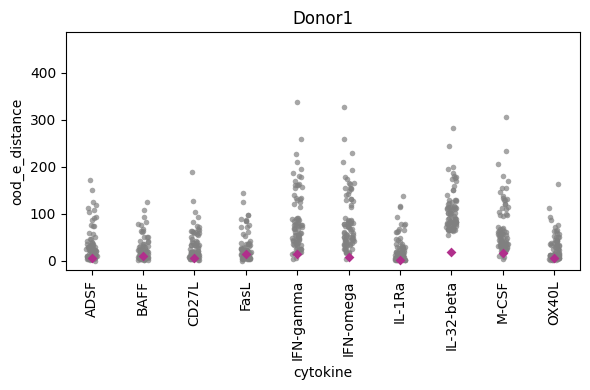

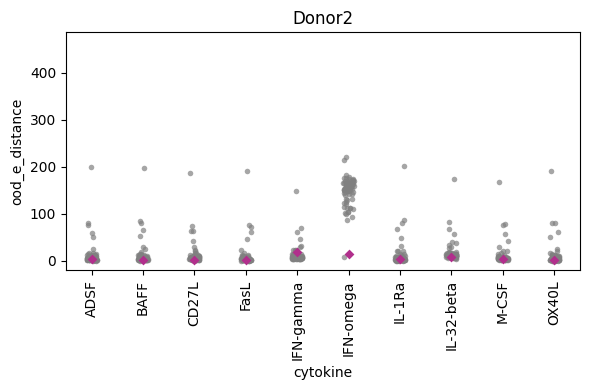

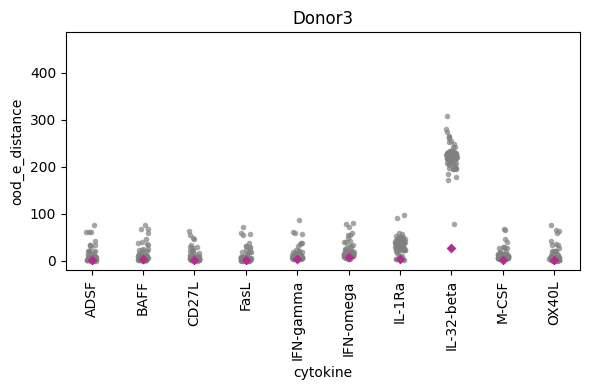

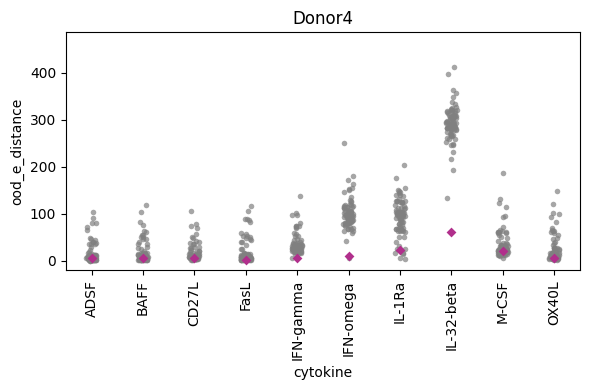

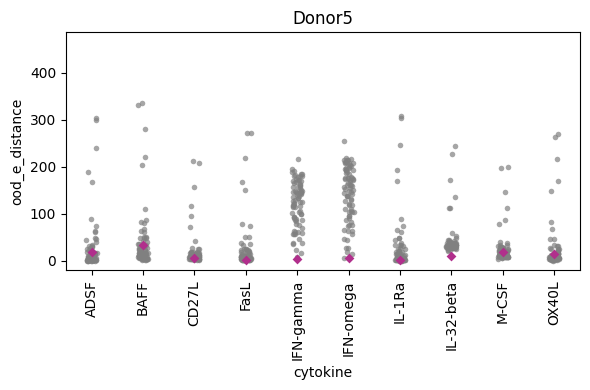

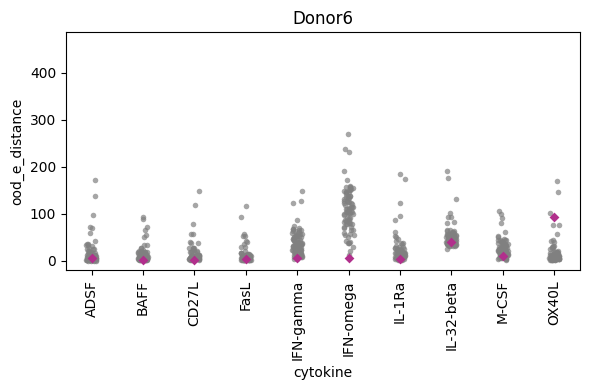

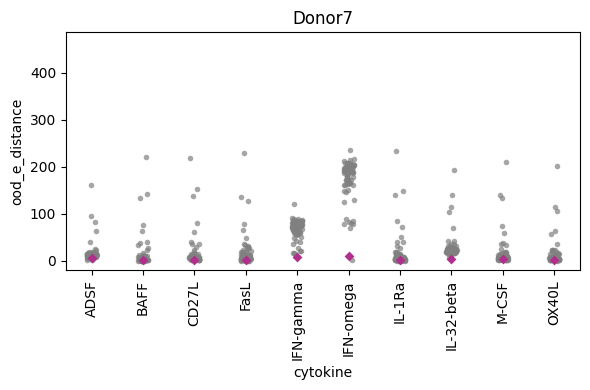

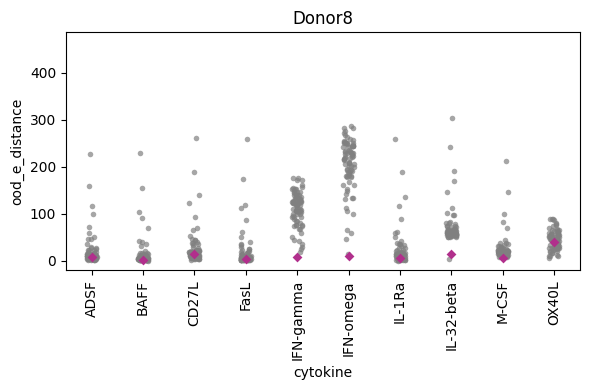

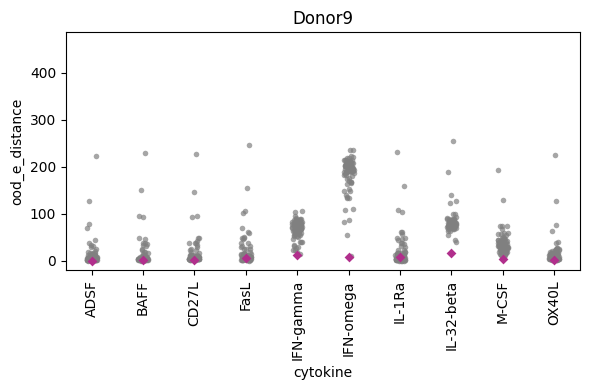

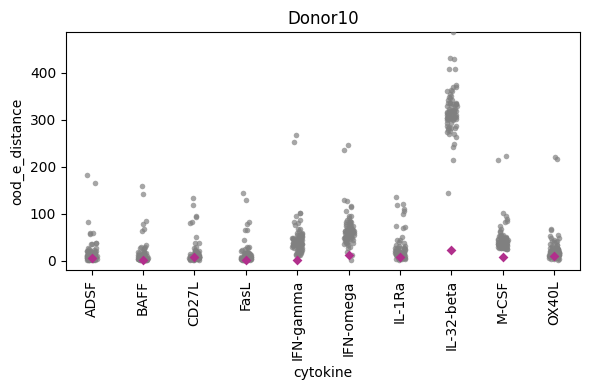

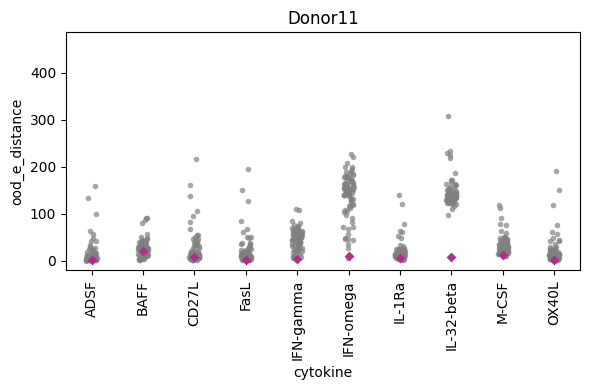

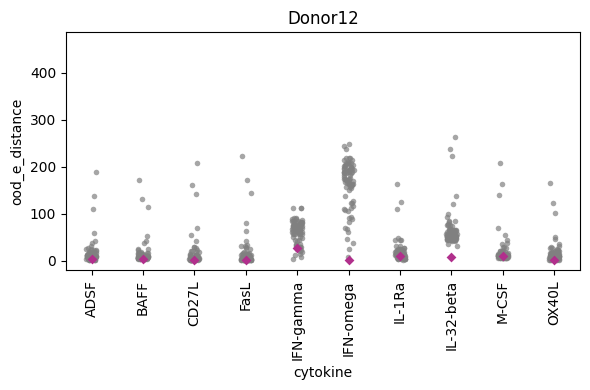

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

donors = [f"Donor{i}" for i in range(1, 13)]

# Compute global y-axis limits for all donors
all_df = pd.concat([
    df_cf[df_cf["donor"].isin(donors)],
    df_cyto[df_cyto["donor"].isin(donors)][df_cf.columns]
])
all_df["type"] = all_df.apply(
    lambda x: "CellFlow" if x["method"] == "CellFlow" else "training_reference", axis=1
)
ymin, ymax = -20, all_df["ood_e_distance"].max()

for donor in donors:
    df_c = df_cyto[df_cyto["donor"] == donor]
    df_1 = pd.concat((df_cf[df_cf["donor"] == donor], df_c[df_cf.columns]))
    df_1["condition"] = df_1.index
    df_1["type"] = df_1.apply(
        lambda x: "CellFlow" if x["method"] == "CellFlow" else "training_reference", axis=1
    )

    plt.figure(figsize=(6, 4))

    # Reference values
    sns.stripplot(
        data=df_1[df_1["type"] == "training_reference"],
        x="cytokine", y="ood_e_distance",
        color="gray", alpha=0.7, size=4, jitter=True
    )

    # CellFlow values
    sns.stripplot(
        data=df_1[df_1["type"] == "CellFlow"],
        x="cytokine", y="ood_e_distance",
        color="#B12F8C", size=5, marker="D", jitter=True
    )

    plt.title(donor)
    plt.xticks(rotation=90)
    plt.ylim(ymin, ymax)  # Shared y-axis
    plt.legend([], [], frameon=False)
    plt.tight_layout()

    # Save and show
    plt.savefig(os.path.join(output_dir, f"{donor}_ood_distance_stripplot.pdf"), format="pdf")
    plt.show()
    plt.close()


In [203]:
df_c

,ood_e_distance,donor,cytokine,method,type,rank
Donor12_IL-32-beta,9.323238,Donor12,IL-32-beta,CellFlow,CellFlow,0
2187,52.318250,Donor12,IL-32-beta,4-1BBL,training_reference,1
2188,64.744617,Donor12,IL-32-beta,APRIL,training_reference,2
2189,76.649223,Donor12,IL-32-beta,C3a,training_reference,3
2190,63.107600,Donor12,IL-32-beta,C5a,training_reference,4
...,...,...,...,...,...,...
2263,44.441220,Donor12,IL-32-beta,TPO,training_reference,77
2264,46.187954,Donor12,IL-32-beta,TRAIL,training_reference,78
2265,56.228820,Donor12,IL-32-beta,TSLP,training_reference,79
2266,45.900329,Donor12,IL-32-beta,TWEAK,training_reference,80


In [207]:
import numpy as np
for donor in donors:
    df_c = all_df[(all_df["donor"] == donor) & (all_df["cytokine"]=="IL-32-beta")]
    df_c = df_c.sort_values("ood_e_distance")
    df_c["rank"] = np.arange(len(df_c))
    print(df_c[df_c["method"]=="CellFlow"]["rank"])


Donor1_IL-32-beta    0
Name: rank, dtype: int64
Donor2_IL-32-beta    16
Name: rank, dtype: int64
Donor3_IL-32-beta    0
Name: rank, dtype: int64
Donor4_IL-32-beta    0
Name: rank, dtype: int64
Donor5_IL-32-beta    0
Name: rank, dtype: int64
Donor6_IL-32-beta    25
Name: rank, dtype: int64
Donor7_IL-32-beta    0
Name: rank, dtype: int64
Donor8_IL-32-beta    1
Name: rank, dtype: int64
Donor9_IL-32-beta    0
Name: rank, dtype: int64
Donor10_IL-32-beta    0
Name: rank, dtype: int64
Donor11_IL-32-beta    0
Name: rank, dtype: int64
Donor12_IL-32-beta    0
Name: rank, dtype: int64
